# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up (with your own code).

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [495]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [496]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]


print ('data shape:', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape: (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

plt.rc() for setting the colormap, for example to black and white

plt.subplot() for creating subplots

plt.imshow() for rendering a matrix

np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

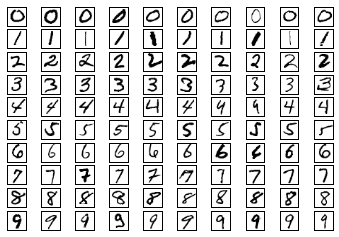

In [497]:
def P1(num_examples=10):
    for i in range(0,10):
        for j in range (0,num_examples):
            # selecting labels and training data with specific digits
            iid=mini_train_labels==i
            mini_i=mini_train_data[iid]
            #reshaping the 1X784 array to a square 28X28 array and plot as image
            Z=np.reshape(mini_i[j,],(28,28))
            ax=plt.subplot(10,10,i*10+j+1)
            plt.setp(ax,xticks=(),yticks=())
            plt.imshow(Z,cmap='Greys')           
 
    return;

P1(10)


(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

KNeighborsClassifier() for fitting and predicting

classification_report() for producing precision, recall, F1 results

In [498]:
# defining a function for K- Nearest neighbors classifier.
# The function will take the follwoing parameters
# k = K  Nearest neighbors value
# tX = training data
# tY = training label
# X = test data
# it will return y = predictions for the test data
def KNClassifier(k,tX,tY,X):
    clfk = KNeighborsClassifier(n_neighbors=k)
    clfk.fit(tX,tY)
    y = clfk.predict(X)
    return y
    

def P2(k_values):
    # finding accuracies for the dev set with different k values using the mini training set.
    for i in range(len(k_values)):
        preds=KNClassifier(k_values[i],mini_train_data,mini_train_labels,dev_data)
        print ("k=", k_values[i], "; accuracy:", np.mean(preds == dev_labels))
    return;
 

k_values = [1,3,5,7,9]
P2(k_values)

k= 1 ; accuracy: 0.888
k= 3 ; accuracy: 0.878
k= 5 ; accuracy: 0.869
k= 7 ; accuracy: 0.865
k= 9 ; accuracy: 0.863


In [551]:
#this funtion returns the classification report for a given K-NN, training set and test data
def P2_1(k,tX,tY,X):
    preds=KNClassifier(k,tX,tY,X)
    digit_labels=['0','1','2','3','4','5','6','7','8','9']
    print(classification_report(dev_labels,preds,target_names=digit_labels))
    return;

P2_1(1,mini_train_data,mini_train_labels,dev_data)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



Answer: digit 3 is the most difficult one.


(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

time.time() gives a wall clock value you can use for timing operations

In [513]:
def P3(train_sizes, accuracies):
    for i in range(len(train_sizes)):
        #starting clock
        st_time=time.time()
        
        #predicting with different train sizes
        tr_data=X[:train_sizes[i]]
        tr_labels=Y[:train_sizes[i]]
        preds=KNClassifier(1,tr_data,tr_labels,dev_data) 
        
        # stopping clock and measuring the time it took
        end_time=time.time()
        time_diff=end_time-st_time
        
        #printing report
        print ("train size=", train_sizes[i], "; accuracy:", np.mean(preds == dev_labels),'time(sec) = %.3f' %(time_diff))
        
        # creating array of accuracy for different train sizes
        accuracies.append(np.mean(preds == dev_labels))
    return;

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

train size= 100 ; accuracy: 0.72 time(sec) = 0.158
train size= 200 ; accuracy: 0.786 time(sec) = 0.322
train size= 400 ; accuracy: 0.841 time(sec) = 0.598
train size= 800 ; accuracy: 0.884 time(sec) = 1.228
train size= 1600 ; accuracy: 0.902 time(sec) = 2.524
train size= 3200 ; accuracy: 0.926 time(sec) = 5.150
train size= 6400 ; accuracy: 0.937 time(sec) = 11.216
train size= 12800 ; accuracy: 0.959 time(sec) = 22.846
train size= 25000 ; accuracy: 0.97 time(sec) = 50.429


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

[ 1.24307226]


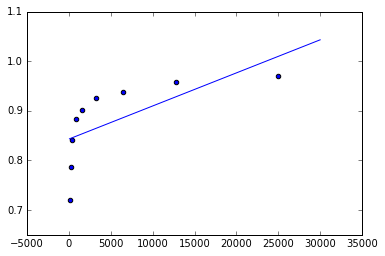

In [515]:
def P4():
    #scatter plot of accuracies vs train sizes
    plt.scatter(train_sizes,accuracies)

    #fitting a linear regression
    linear_regression = LinearRegression()
    linear_regression.fit(np.array(train_sizes).reshape(-1,1),accuracies)

    # Show samples from the fitted function.
    X_test = np.linspace(50,30000,20)
    plt.plot(X_test, linear_regression.predict(X_test[:, np.newaxis]), label="Model")

    # predicitng for n=60000
    print(linear_regression.predict(60000))
    
P4()



from the plot above, we can see that its not a good fit. The accuracy prediction for n=60000 was 124%

array([ 1.03386514])

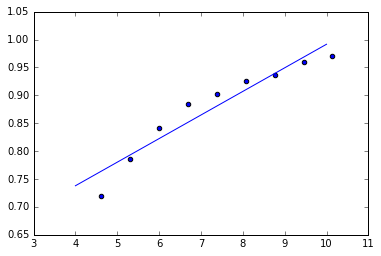

In [516]:
# transforming a log function by taking log of train sizes 
trans_function = lambda x: np.log(x)
new_fun=trans_function(np.array(train_sizes))

# scatter plot: accuracies vs log of train sizes
plt.scatter(new_fun,accuracies)

# fitting the new function
linear_regression = LinearRegression()
linear_regression.fit(new_fun.reshape(-1,1),accuracies)

# Show samples from the fitted function.
X_test = np.linspace(4,10,15)
plt.plot(X_test, linear_regression.predict(X_test[:, np.newaxis]), label="Model")

# predicting accuracy for n=60000 for the transformed function
linear_regression.predict(np.log(60000))

after transforming to a Log function, linear regression showed a better fit. The predicted accuracy (1.03) for n=60000 is still more than 100%, but its only 3% over compared to 24%.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

confusion_matrix() produces a confusion matrix

In [533]:
def P5():

    # Fitting a 1-NN 
    preds=KNClassifier(1,mini_train_data,mini_train_labels,dev_data)

    # output a confusion matrix for the dev data
    digit_labels=['0','1','2','3','4','5','6','7','8','9']
    cm_reg=confusion_matrix(dev_labels,preds)
    print("Confusion matrix:\n",cm_reg)
    
    #output a normalized confusion matrix
    cm_normalized = cm_reg.astype('float') / cm_reg.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:\n",cm_normalized)
    
    #output only the diagonal elements of the normalized confusion matrix
    print("Diagonal elements of the Normalized confusion matrix:\n",cm_normalized.diagonal()[:, np.newaxis])

P5()



Confusion matrix:
 [[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Normalized confusion matrix:
 [[ 0.97979798  0.          0.          0.          0.          0.
   0.02020202  0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.03921569  0.03921569  0.79411765  0.03921569  0.          0.          0.
   0.03921569  0.02941176  0.01960784]
 [ 0.01162791  0.          0.          0.87209302  0.          0.03488372
   0.          0.03488372  0.01162791  0.03488372]
 [ 0.          0.01923077  0.          0.   

From the diagonal elements of the normalized confusion matrix, it seems digit 2 and git 4 are the most confused digits. Examples for both digits are shown below when they were confused with others

In [541]:
# this function will take a digit as an input and will show the images where it was predicted wrong
def P5_1(digitval):

    #selecting indices with specific digit from dev labels 
    ii=dev_labels==digitval

    #selecting corresponding test data and predictions
    dev_data_d=dev_data[ii]
    preds_d=preds[ii]

    #selecting where the predictions were wrong
    jj=preds_d!=digitval
    dev_data_d_w=dev_data_d[jj]

    #plotting all the wrong predictions
    for i in range(0,dev_data_d_w.shape[0]):
        Z=np.reshape(dev_data_d_w[i,],(28,28))
        ax=plt.subplot(5,5,i+1)
        plt.setp(ax,xticks=(),yticks=())
        plt.imshow(Z,cmap='Greys')
        
    return;

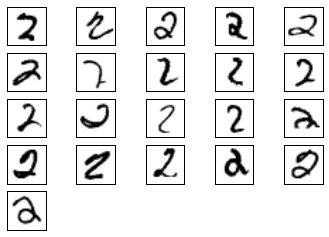

In [544]:
# plotting where 2s were predicted wrong
P5_1(2)

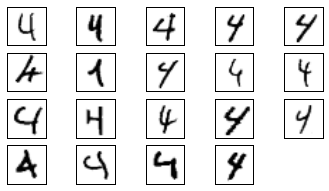

In [545]:
#plotting where 4s were predicted wrong
P5_1(4)

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:

preprocess the training data but not the dev data

preprocess the dev data but not the training data

preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.


In [546]:
# this function returns an array of 3X3 with weight values for the neighboring pixels.
# the weight values are calculated using a Gaussian function based on the distance from the center
def gauss_blurr():
    x=np.arange(-1,2,1)
    y=np.arange(-1,2,1)
    xx,yy=np.meshgrid(x,y)
    
    # weight values are calculated using a Gaussian function
    zz=np.exp(-2*(xx**2+yy**2))
    return zz;

# this function returns the processed data set after applying Gaussian blurr
def apply_gauss_blurr(testx):
    # initializing a zero array
    new_testx=np.zeros((testx.shape))
    
    for k in range(0,testx.shape[0]):
        # selecting a row and then reshaping to a 28X28 matrix
        Z=np.reshape(testx[k,],(28,28))
        Z1=np.zeros((28,28))    
        for i in range (1,27):
            for j in range (1,27):
                #applying Gaussian blurr for each pixels
                Z1[i,j]=sum(sum(Z[i-1:i+2,j-1:j+2]*gauss_blurr()))
                
        #updating the row
        new_testx[k,]=np.reshape(Z1,(1,784))
    return new_testx

In [547]:
# applying Gaussian blurr to the mini training set
new_mini_train_data=apply_gauss_blurr(mini_train_data)

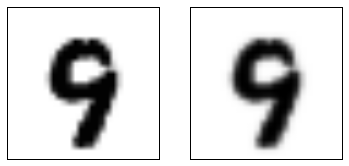

In [548]:
# show side by side images before and after applying Gaussian blurr
A=np.reshape(mini_train_data[1,],(28,28))
ax=plt.subplot(1,2,1)
plt.setp(ax,xticks=(),yticks=())
plt.imshow(A,cmap='Greys')

B=np.reshape(new_mini_train_data[1,],(28,28))
ax=plt.subplot(1,2,2)
plt.setp(ax,xticks=(),yticks=())
plt.imshow(B,cmap='Greys')

In [549]:
# applying Gaussian blurr to the Dev set
new_dev_data=apply_gauss_blurr(dev_data)

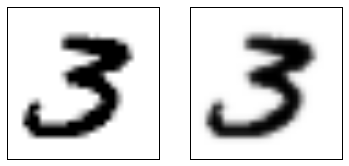

In [550]:
# show side by side images before and after applying Gaussian blurr
A=np.reshape(dev_data[1,],(28,28))
ax=plt.subplot(1,2,1)
plt.setp(ax,xticks=(),yticks=())
plt.imshow(A,cmap='Greys')

B=np.reshape(new_dev_data[1,],(28,28))
ax=plt.subplot(1,2,2)
plt.setp(ax,xticks=(),yticks=())
plt.imshow(B,cmap='Greys')

In [553]:
#classification report for 1-NN, not processed training set, not processed Dev data
P2_1(1,mini_train_data,mini_train_labels,dev_data)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



In [552]:
#classification report for 1-NN, preprocessed training set, not processed Dev data
P2_1(1,new_mini_train_data,mini_train_labels,dev_data)

             precision    recall  f1-score   support

          0       0.86      0.92      0.89        99
          1       0.58      0.99      0.73       105
          2       0.97      0.63      0.76       102
          3       0.74      0.74      0.74        86
          4       0.73      0.77      0.75       104
          5       0.74      0.63      0.68        91
          6       0.92      0.89      0.90        98
          7       0.86      0.80      0.83       113
          8       0.93      0.65      0.76        96
          9       0.72      0.74      0.73       106

avg / total       0.80      0.78      0.78      1000



In [554]:
#classification report for 1-NN, not processed training set, pre-processed Dev data
P2_1(1,mini_train_data,mini_train_labels,new_dev_data)

             precision    recall  f1-score   support

          0       0.87      0.98      0.92        99
          1       0.94      0.99      0.96       105
          2       0.98      0.85      0.91       102
          3       0.81      0.84      0.82        86
          4       0.95      0.75      0.84       104
          5       0.94      0.85      0.89        91
          6       0.93      0.95      0.94        98
          7       0.88      0.88      0.88       113
          8       0.86      0.86      0.86        96
          9       0.73      0.88      0.80       106

avg / total       0.89      0.88      0.88      1000



In [555]:
#classification report for 1-NN, preprocessed training set, preprocessed Dev data
P2_1(1,new_mini_train_data,mini_train_labels,new_dev_data)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.90      0.99      0.94       105
          2       0.99      0.82      0.90       102
          3       0.80      0.86      0.83        86
          4       0.91      0.83      0.87       104
          5       0.91      0.86      0.88        91
          6       0.95      0.96      0.95        98
          7       0.90      0.92      0.91       113
          8       0.95      0.90      0.92        96
          9       0.79      0.85      0.82       106

avg / total       0.90      0.90      0.90      1000



ANSWER:

The accuracies have been shown above for four cases.

Case 1: neither training set nor the dev set was preprocessed

Case 2:Training set were preprocessed but not the dev set

case 3: Dev set was preprocessed but not the training set

Case 4: both the training set and the Dev set were preprocessed.

Out of these four cases, accuracy is worst when training set was preprocessesd but not the dev set. It can be because of loss of information from the training set which made the model poor. Preprocessing the dev set may seem to have same accuracy as Case 1, but some of the classes which had low accuarcy for Case 1, had better accuracy for preprocessed dev set.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [579]:
#This function takes data, threshold and labels as inputs and returns mapped data based on the labels
def map_data(data, thresholds=[0.5],labels=[0,1]):
    # Initialize a new feature array with the same shape as the original data.
    mapped_data = np.zeros(data.shape)

    # Apply a threshold  to each feature.
    ii=data<thresholds[0]
    mapped_data[ii]=labels[0]
    #map data based on the number of labels
    for i in range(len(thresholds)):
        ii=data>thresholds[i]
        mapped_data[ii]=labels[i+1]        
    return mapped_data

def P7():
    #binarize data
    binarized_train_data=map_data(mini_train_data)
    binarized_dev_data=map_data(dev_data)
    # BernoulliNB
    clf = BernoulliNB()
    clf.fit(binarized_train_data, mini_train_labels)
    print ('BernouliNB accuracy: %3.2f' %clf.score(binarized_dev_data, dev_labels))

    # map data to 0, 1, 2   
    multi_train_data=map_data(mini_train_data,[0.25,0.67],[0,1,2])
    multi_dev_data=map_data(dev_data,[0.25,0.67],[0,1,2])
    
    # MultinomialNB
    clf_multi = MultinomialNB()   
    clf_multi.fit(multi_train_data, mini_train_labels)
    print ('MultinomialNB accuracy: %3.2f' %clf_multi.score(multi_dev_data, dev_labels))
    return;

P7()

BernouliNB accuracy: 0.81
MultinomialNB accuracy: 0.80


ANSWER: The MultinomialNB didnt improve the accuracy. Mapping the pixel values to 0, 1 and 2 didnt actually incraese the helpful information.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [583]:
def P8(alphas):
    #creating instance of GridSearchCV with BernoulliNB and alphas
    clf = GridSearchCV(BernoulliNB(), alphas)
    
    #Binarize data
    binarized_train_data=map_data(mini_train_data)
    binarized_dev_data=map_data(dev_data)
    
    #fit
    clf.fit(binarized_train_data, mini_train_labels)
    return clf


alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\rsshishi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\rsshishi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\rsshishi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\rsshishi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [588]:
print (nb.best_params_,nb.best_score_)

# calculating accuracy with alpha=0
clf = BernoulliNB(alpha=0)
clf.fit(binarized_train_data, mini_train_labels)
print ('BernouliNB accuracy with alpha=0: %3.2f' %clf.score(binarized_dev_data, dev_labels))


{'alpha': 0.01} 0.821
BernouliNB accuracy with alpha=0: 0.10


C:\Users\rsshishi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


ANSWER: best alpha = 0.01. alpha =0 gives only 10% accuracy, which is expected due to the absence of any smoothing.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta_ and sigma_.

In [586]:
def P9():
    # GaussianNB with real valued feaures
    clf = GaussianNB()
    clf.fit(mini_train_data, mini_train_labels)
    print ('GaussianNB accuracy: %3.2f' %clf.score(dev_data, dev_labels))
    return clf

gnb = P9()

GaussianNB accuracy: 0.62


In [587]:
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels

# increasing sigma for GaussianNB        
clf.sigma_=clf.sigma_+.02
print ('GaussianNB accuracy with increased sigma: %3.2f' %clf.score(dev_data, dev_labels))

GaussianNB accuracy with increased sigma: 0.79


ANSWER: For GaussianNB, the sigma values are very small, so if a test point is slightly off then its probbaility is almost 0. by incraesing the sigma little bit can improve the accuracy.

   
(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?
You can use np.random.rand() to generate random numbers from a uniform distribution

The estimated probability of each pixel is stored in feature_log_prob_. You'll need to use np.exp() to convert a log probability back to a probability.

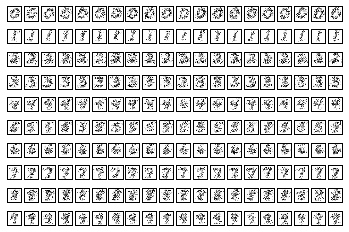

In [592]:
def P10(num_examples):
    #Training a BernoulliNB model
    binarized_train_data=map_data(mini_train_data)
    binarized_dev_data=map_data(dev_data)
    clf = BernoulliNB()  
    clf.fit(binarized_train_data, mini_train_labels)
    
    # running for loop for all digits
    for k in range(0,10):
        # initializing a zeros matrix for a specific digit num_example times
        ZZ=np.zeros((num_examples,784))
        for i in range(0,784):
            
            #finding the prob of a pixel to be 1. log prob is converted back to prob using exp function.
            p=np.int(np.round(20*np.exp(clf.feature_log_prob_[k,i])))
            
            #generate a random sample which will have that pixel value 1 based on the prob
            a=np.random.randint(num_examples,size=p)
            ZZ[a,i]=1 
        # show num_example samples of the digit
        for i in range(0,num_examples):
            Z=np.reshape(ZZ[i,],(28,28))
            ax=plt.subplot(10,num_examples,num_examples*k+i+1)
            plt.setp(ax,xticks=(),yticks=())
            plt.imshow(Z,cmap='Greys') 
    return;

P10(20)

ANSWER: Since we are using a Bernoulli model, each pixel output will be either 0 or 1 and that makes the digits more granular, more disconnected. 

  
(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [613]:
def P11(buckets, correct, total):
    # training a BernoulliNB model  
    binarized_train_data=map_data(mini_train_data)
    binarized_dev_data=map_data(dev_data)    
    clf = BernoulliNB()
    
    #fit the model
    clf.fit(binarized_train_data, mini_train_labels)
    
    #finding the prediction probability
    preds=clf.predict(binarized_dev_data)
    pred_prob=clf.predict_proba(binarized_dev_data)
    
    # finding the maximum probability for each set of data
    max_pred_prob=np.amax(pred_prob,axis=1)
    
    #creating bins based on the bucket values.
    #------------------------------------------------- 
      
    # finding maximum probability based on bucket value
    condlist=[(max_pred_prob<=buckets[0])]
    
    # counting total and correct for that bin 
    correct_count=np.count_nonzero(preds[condlist]==dev_labels[condlist])  
    total_count=len(preds[condlist])
    
    # updating total and correct list
    correct[0]=correct_count
    total[0]=total_count
    
    # repeat the same for the other bins
    for i in range(len(buckets)-1):
        condlist=[(max_pred_prob<=buckets[i+1]) & (max_pred_prob>=buckets[i])]
        correct_count=np.count_nonzero(preds[condlist]==dev_labels[condlist])    
        total_count=len(preds[condlist])
        correct[i+1]=correct_count
        total[i+1]=total_count
    return;

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  35    accuracy = 0.457
p(pred) <= 0.9990000000000    total =  98    accuracy = 0.449
p(pred) <= 0.9999900000000    total =  87    accuracy = 0.632
p(pred) <= 0.9999999000000    total =  76    accuracy = 0.684
p(pred) <= 0.9999999990000    total =  90    accuracy = 0.833
p(pred) <= 0.9999999999900    total =  88    accuracy = 0.841
p(pred) <= 0.9999999999999    total =  69    accuracy = 0.841
p(pred) <= 1.0000000000000    total = 457    accuracy = 0.965


ANSWER: The accuracy increases with posterior probbaility increases. So NB is a strongly calibrated classifier.

(12) EXTRA CREDIT
Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:

Try summing the pixel values in each row and each column.

Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [223]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()